# Problema 1: Inversiones en acciones

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## 1.- Análisis de datos

Dimension x: (365,)
Dimension y: (365,)


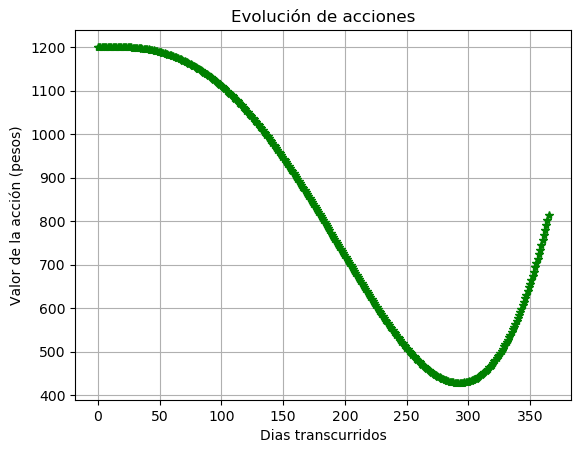

Y minimo: 428.13316510748996
Y máximo: 772.7537388030989


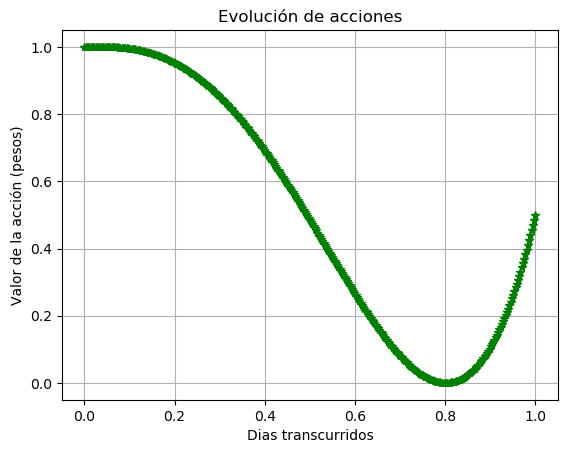

In [136]:
#Cargar datos
data = np.load('datos/datos_p1.npy')

#Extraer informacion
x = data[:, 0]
y = data[:, 1]

print("Dimension x: "+str(x.shape[:]))
print("Dimension y: "+str(y.shape[:]))


#Graficar valores
plt.title("Evolución de acciones")
plt.xlabel("Dias transcurridos")
plt.ylabel("Valor de la acción (pesos)")
plt.plot(x, y, '*', color='g');
plt.grid()
plt.show()




#normalizar x
x_min=np.min(x)
x=x-np.min(x)
x_max=np.max(x)
x=x/np.max(x)

#normalizar y
y_min=np.min(y)
y=y-np.min(y)
y_max=np.max(y)
y=y/np.max(y)

print("Y minimo: "+str(y_min))
print("Y máximo: "+str(y_max))

#Graficar valores
plt.title("Evolución de acciones")
plt.xlabel("Dias transcurridos")
plt.ylabel("Valor de la acción (pesos)")
plt.plot(x, y, '*', color='g');
plt.grid()
plt.show()

## 2.- Definición del modelo

In [137]:
#Error medio cuadratico
def emc(ym, yd):
    e=0.5*np.power(ym-yd,2)
    return e

In [138]:
#crear modelo
class cuarta():
    #constructor
    def __init__(self,a,b,c,d,f):
        #Inicializar parametros del modelo
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.f = f
    
    #Procesamiento (forward pass)
    def forward(self,x):
        
        ym=self.a*np.power(x,4)+self.b*np.power(x,3)+self.c*np.power(x,2)+self.d*x+self.f
        
        return ym
    
    #metodo de entrenamiento
    def train(self,x,y,Lr,epoch):
        
        #inicializar el error
        self.e=np.zeros(epoch)
        
        #lazo.epocas
        for i in range(epoch):
            
            #lazo de los datos
            for j in range(x.shape[0]):
                
                #obtener datos de entrada
                x_in=x[j]
                yd=y[j]
                
                #obtener salida del modelo
                ym=self.a*np.power(x_in,4)+self.b*np.power(x_in,3)+self.c*np.power(x_in,2)+self.d*x_in+self.f
                
                #gradientes de la funcion de error
                de_ym=(ym-yd)
                
                #gradientes del modelo
                dym_a=np.power(x_in,4)
                dym_b=np.power(x_in,3)
                dym_c=np.power(x_in,2)
                dym_d=x_in
                dym_f=1
                
                #calcular gradientes de variables
                de_a=de_ym*dym_a
                de_b=de_ym*dym_b
                de_c=de_ym*dym_c
                de_d=de_ym*dym_d
                de_f=de_ym*dym_f
                
                #actualizar parametros
                self.a=self.a-Lr*de_a
                self.b=self.b-Lr*de_b
                self.c=self.c-Lr*de_c
                self.d=self.d-Lr*de_d
                self.f=self.f-Lr*de_f
                
                #calcular error
                self.e[i]=self.e[i]+emc(ym,yd)
            
            #promediar error de la epoca
            self.e[i]=self.e[i]/x.shape[0]
                

## 3.- Creación del modelo

In [139]:
#crear instancia del modelo
inversiones=cuarta(0.9,5.5,-9.0,2.0,0.9)

## 4.- Entrenamiento del modelo

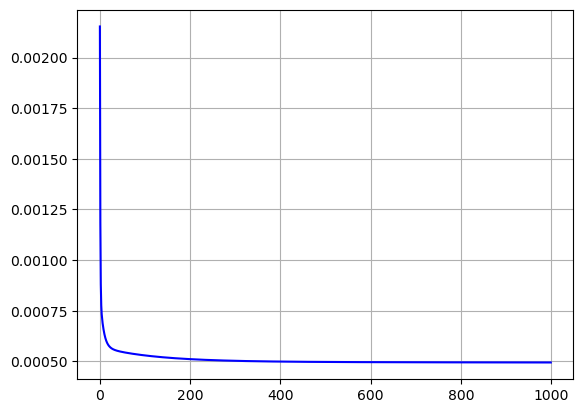

In [140]:
#entrenar modelo
inversiones.train(x,y,0.001,1000)


#imprimir error
plt.figure(1)
plt.plot(inversiones.e,"b")
plt.grid()
plt.show()

## 5.- Implementación del modelo

Dimension de la entrada: (365,)
Parametros FINALES: 
 a: 0.8716016667328877
 b: 5.490500860701228
 c: -8.926473771057035
 d: 2.1092550507001357
 f: 0.8869769707881946
Error: 0.000494566201577238


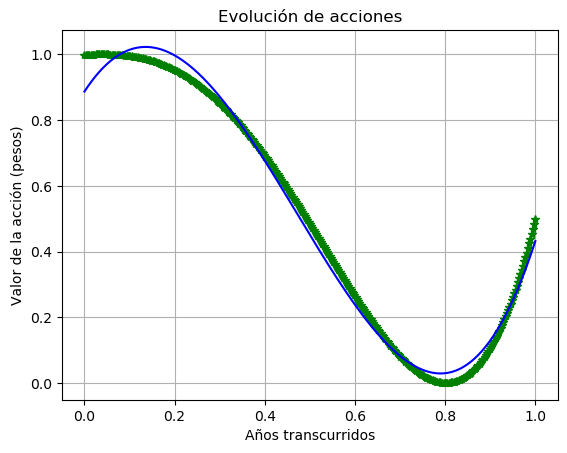

In [141]:
#Inicializar salida del modelo
ym=np.zeros(y.shape)

#inicializar el error
e=0.0

print("Dimension de la entrada: "+str(x.shape))
print ("Parametros FINALES: ")
print(" a: " + str(inversiones.a))
print(" b: " + str(inversiones.b))
print(" c: " + str(inversiones.c))
print(" d: " + str(inversiones.d))
print(" f: " + str(inversiones.f))

#Evaluar modelo en datos
for i in range(x.shape[0]):
    ym[i]=inversiones.forward(x[i])
    
    #calcular error de la entrada
    e=e+emc(ym[i],y[i])

#calcular error promedio
e=e/x.shape[0]


#imprimir error
print("Error: "+ str(e))

#graficar
plt.title("Evolución de acciones")
plt.xlabel("Años transcurridos")
plt.ylabel("Valor de la acción (pesos)")
plt.plot(x, y, '*', color='g');
plt.plot(x[:], ym[:], color='blue');
plt.grid()
plt.show()

## 6.- Predicción con el modelo

In [142]:
#valores finales del polinomio
A=inversiones.a
B=inversiones.b
C=inversiones.c
D=inversiones.d
F=inversiones.f

#vexctor para la predicción
X_pred=np.linspace(0,2,730)
#desnormalizamos
Y_pred=((A*np.power(X_pred,4)+B*np.power(X_pred,3)+C*np.power(X_pred,2)+D*X_pred+F)*y_max)+y_min
X_pred=np.linspace(0,(2*x_max)+x_min,730)#redefinimos el vector x desnormalizandolo


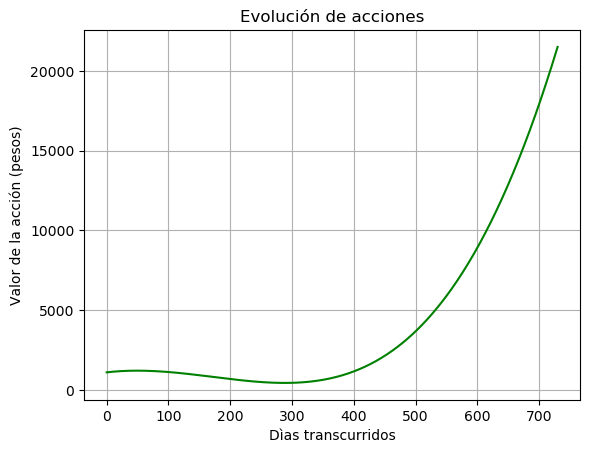

In [143]:
#GRAFICA 
plt.title("Evolución de acciones")
plt.xlabel("Dìas transcurridos")
plt.ylabel("Valor de la acción (pesos)")
plt.plot(X_pred, Y_pred, color='g');
plt.grid()
plt.show()